### Кластерный анализ и классификация: методы предпосылки, методы проведения, анализ результатов.

**Кластерный анализ** - это процесс разбиения множества объектов на отдельные группы (кластеры) таким образом, чтобы объекты в группах имели схожие черты.  
Например, у нас есть база данных о клиентах в магазине и мы хотим провести анализ платежеспособности в каждой группе. Для этого проведём кластеризацию и выявим основные группы, это могут быть, например: щедрые и экономные покупатели, мужчины и женщины и т.д. по результатам кластерного анализа мы можем напрявлять уведомления о скидках экономным покупателям, а щедрым - новые поступления.  

**Классификация** - это процесс разбиения множества объектов на отдельные классы по известным свойствам.  
Например, фильтрация спама на почте, распределение новостей по тематикам, распознавание изображений.   

Основное отличие классификации от кластеризации заключается в том, что методы классификации используют обучающие наборы данных (т.е. те, в которых известны свойства групп), в то время как кластерицация является методом обучения без учителя и свойства групп определяет самостоятельно.  
[![2024-12-15-14-02-06.png](https://i.postimg.cc/Ls7PkXqB/2024-12-15-14-02-06.png)](https://postimg.cc/3yXWY3Fd)



**Основные методы кластерного анализа:**  
1. *Иерархическая кластеризация* — данные группируются последовательно, от отдельных элементов к объединённым кластерам или наоборот. Этот метод позволяет увидеть структуру данных и связи между кластерами.  
2. *K-means кластеризация* — данные разделяются на заранее заданное количество кластеров (K). Алгоритм итеративно находит центры кластеров и назначает точки данным кластерам в зависимости от расстояния до центров. Этот метод прост в реализации и быстро работает, но может сходиться к локальным оптимумам.  
3. *DBSCAN* (Density-Based Spatial Clustering of Applications with Noise) — алгоритм, который группирует данные на основе плотности точек в пространстве. Он определяет кластеры как области высокой плотности точек, игнорируя выбросы (точки шума). Этот метод подходит для данных с неравномерным распределением и сложной структурой.    

[![2856-05-vybor-metoda-klasterizacii.png](https://i.postimg.cc/rpF6Gy6m/2856-05-vybor-metoda-klasterizacii.png)](https://postimg.cc/FYqnN4H5)


**Основные методы классификации:**  
1. *Логистическая регрессия* — модель, которая предсказывает вероятность принадлежности объекта к определённому классу на основе линейной комбинации признаков.  
2. *Деревья решений* — метод, который представляет собой иерархическую структуру, где каждый узел принимает решение о разделении данных на основе их признаков.  
3. *Метод k-ближайших соседей (k-NN)* — алгоритм, который относит объект к классу на основе голосования его k ближайших соседей в пространстве признаков.  
4. *Нейронные сети* — модели, состоящие из слоёв искусственных нейронов, которые обучаются на основе примеров и способны находить сложные зависимости между признаками.  
5. *Метод опорных векторов (SVM)* — алгоритм, который ищет оптимальную разделяющую гиперплоскость между классами, максимизируя расстояние до ближайших точек.  

[![SVM-plot-ex.png](https://i.postimg.cc/RFyjzcW6/SVM-plot-ex.png)](https://postimg.cc/S2LZ6Y7k)

In [1]:
# Рассмотрим пример кластерного анализа
import pandas as pd # Импортируем библиотеки для работы с даннми
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
df=pd.read_csv('mobile_usage_behavioral_analysis.csv') # Загружаем датасет об использовании сматрфонов
# Подробное описание данных: https://www.kaggle.com/code/rudraprasadbhuyan/smartphone-usage
df.head() # Проверяем загрузку датасета

,User_ID,Age,Gender,Total_App_Usage_Hours,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,2.61,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,2.13,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,7.28,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,1.20,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,6.31,12.59,14,3.15,0.13,4.00,New York


In [2]:
# Для кластеризации возьмем два числовых признака
df_clustering = df[['Social_Media_Usage_Hours', 'Gaming_App_Usage_Hours']]

In [3]:
# Кластеризуем данные алгоритмом KMeans
from sklearn.cluster import KMeans # Импортируем метод
kmeans = KMeans(n_clusters=3) # Создаем объект класса и выбираем к-во кластеров 3
kmeans.fit(df_clustering) # Обучаем

KMeans(n_clusters=3)

In [5]:
# Добавим переменную cluster к датафрейму, обозначающую номер группы наблюдения
cluster = kmeans.fit_predict(df_clustering)
df_clustering.loc[:,'cluster'] = cluster
df_clustering.head()

,Social_Media_Usage_Hours,Gaming_App_Usage_Hours,cluster
0,4.43,2.40,2
1,4.67,2.43,2
2,4.58,2.83,2
3,3.18,4.58,0
4,3.15,4.00,0


In [6]:
# Центры полученных кластеров можно посмотреть при помощи команды .cluster_centers_
kmeans.cluster_centers_

array([[ 2.34262248e+00,  4.10089337e+00,  1.00000000e+00],
       [ 1.16355140e+00,  1.52003115e+00,  2.00000000e+00],
       [ 3.82512048e+00,  1.70021084e+00, -1.11022302e-16]])

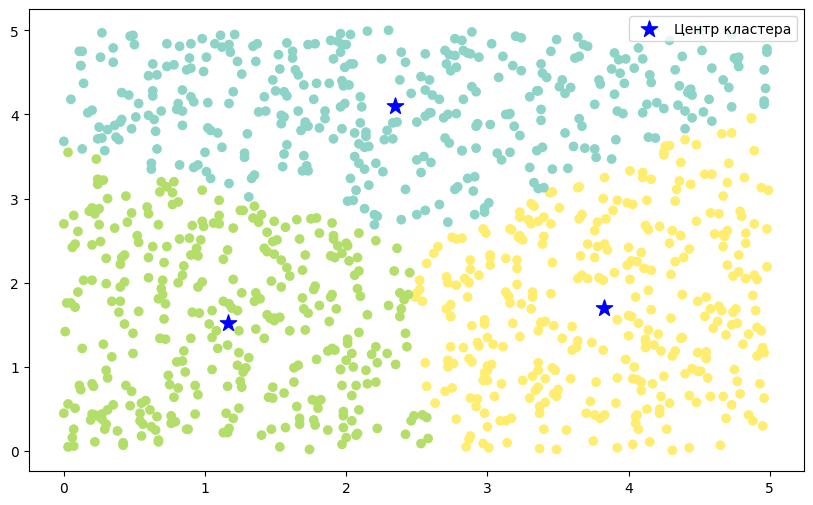

In [7]:
# Изобразим полученный результат
plt.figure(figsize = (10,6))
plt.scatter(df_clustering.iloc[:,0], df_clustering.iloc[:,1], c = df_clustering.iloc[:,2], cmap='Set3') # Строим диаграмму рассеяния
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'blue', marker = '*', label = 'Центр кластера') # Отмечаем центры кластера
plt.legend(loc = 'upper right')

In [8]:
# Составить профиль кластера (характерные для группы черты) можно с помощью рассмотрение средних значений по каждой переменной в каждой группе
df_clustering.groupby(by = 'cluster', as_index= False).mean()

,cluster,Social_Media_Usage_Hours,Gaming_App_Usage_Hours
0,0,2.342622,4.100893
1,1,1.163551,1.520031
2,2,3.825120,1.700211


<Axes: xlabel='cluster', ylabel='Social_Media_Usage_Hours'>

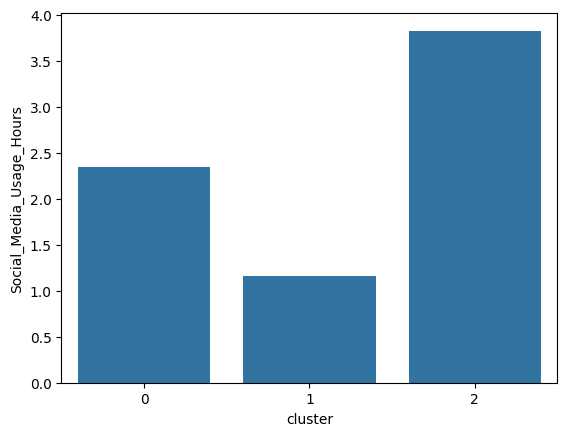

In [9]:
# Для наглядности можно использовать визуальные элементы
sns.barplot(df_clustering.groupby(by = 'cluster', as_index= False).mean(), x="cluster", y="Social_Media_Usage_Hours")
# Для показателя об использовании социальных сетей можем сделать следующий вывод:
# Кластер № 0 - минимальное к-во часов в социальных сетях
# Кластер № 1 - среднее к-во часов в социальных сетях
# Кластер № 2 - максимальное к-во часов в социальных сетях

<Axes: xlabel='cluster', ylabel='Gaming_App_Usage_Hours'>

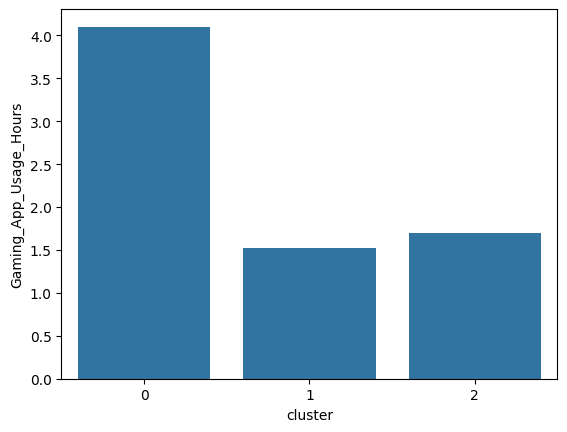

In [10]:
sns.barplot(df_clustering.groupby(by = 'cluster', as_index= False).mean(), x="cluster", y="Gaming_App_Usage_Hours")
# Кластер № 0 - минимальное к-во часов в играх
# Кластер № 1 - максимальное к-во часов в играх
# Кластер № 2 - минимальное к-во часов в играх

Следовательно, мы можем интерпретировать полученные результаты следующим образом:  
Кластер № 0 характеризуется минимальным к-вом часов проведенных и в социальных сетях и в играх (т.е. малое потребление игрового и социального контента).  
Кластер № 1 характеризуется средним к-вом часов в социальных сетях и самым большим к-вом часов, проведенных в мобильных играх (т.е. использование телефона для игр и умеренного потребления контента социальных сетей).  
Кластер № 2 характеризуется большим к-вом проведенных часов в социальных сетях и низким к-вом часов игры (т.е. использование телефона для социальх сетей).  
  
Допустим, перед нами стоит задача запустить рекламу о выходе новой мобильной игры для определенной группы людей в социальной сети. В таком случае мы можем распространить нашу рекламу на кластер № 1, в котором люди активно играют и при этом используют социальные сети.

In [11]:
# Рассмотрим пример классификации
df=pd.read_csv('final_test.csv') # Загружаем датасет о размерах одежды
# Подробное описание данных: https://www.kaggle.com/datasets/tourist55/clothessizeprediction/data
df.head() # Проверяем загрузку датасета

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [12]:
# Удалим пропущенные значения
df.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [13]:
df['age'] = df ['age'].fillna(df['age'].median())
df['height'] = df ['height'].fillna(df['height'].median())

In [14]:
# Также для повышения точности работы алгоритмов добавим новые переменные
df["bmi"] = df["height"]/df["weight"]
df["weight-squared"] = df["weight"] * df["weight"]

In [15]:
# Разделим выборку на обучающую и тестовую. На обучаюей выборке будет производится тренировка модели, на тестовой - проверка точности
from sklearn.model_selection import train_test_split # Для разделения используем функцию train_test_split
X = df.drop('size', axis=1)
y = df['size'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42) # test_size задает соотношение разделения, в данном случае 80 на 20, random_state позволяет сохранять разбиение при новом обучении модели

In [16]:
# Итоговое разделение
len(X_train), len(X_test)

(95787, 23947)

In [17]:
from sklearn.ensemble import RandomForestClassifier # Для классификации будем использовать модель случайного леса
from sklearn.metrics import accuracy_score # Импортируем метрику точности
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) # Создаем объект с настройками
rf_classifier.fit(X_train, y_train) # Обучение модели

RandomForestClassifier(random_state=42)

In [18]:
y_pred = rf_classifier.predict(X_test) # Прогнозируем классы для тестовой выборки
accuracy = accuracy_score(y_test, y_pred) # Оцениваем точность модели
print(f"Точность модели: {accuracy:.2f}") # Точность модели назкая, примерно в половине случаев классификатор будет работать правильно

Точность модели: 0.51


In [21]:
# Попробуем улучшить точность при помощи GridSearch - функции, которая перебирает различные настройки модели и возвращает наилучший результат
from sklearn.model_selection import GridSearchCV
param_grid = { # Задаем параметры настроек для перебора
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2) # Создание экземпляра GridSearchCV
grid_search.fit(X_train, y_train) # Поиск лучших параметров


In [19]:
# Выводим лучшие параметры модели
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшие параметры: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [20]:
best_rf_classifier = grid_search.best_estimator_ # Передаем лучшие параметры для предсказания
y_pred_best = best_rf_classifier.predict(X_test) # Предсказания на тестовой выборке
best_accuracy = accuracy_score(y_test, y_pred_best) # Оценка точности модели с лучшими параметрами
print(f"Точность модели с лучшими параметрами: {best_accuracy:.2f}")
# С помощью GridSearch получилось увеличить точность модели на 0,01 
# Также точность можно увеличить при помощи другой модели, новых переменных, новому походу к обработке, предварительного проведения факторного анализа - т.е. процесс с момента обработки данных до обучения модели является полностью эксперименталиным и заранее невозможно предугадать какая модель отработает наилучшим образом. 

Точность модели с лучшими параметрами: 0.52


### Задание 1  
По датафрейму об использовании телефонов провести кластерный анализ со всеми числовыми переменными и тремя любыми алгоритмами кластеризации (кроме к-средних). Описать профиль кластеров для каждого алгоритма, выбрать наилучшее разделение данных.  

### Задание 2  
Улучшить точность модели классификации размеров одежды до 0,7 и выше.